In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/Users/jagan/Documents/coding/projects/fraud-detection-system/data/processed/merged_ieee_cis.csv')

In [3]:
fraud_rate = data.groupby('ProductCD')['isFraud'].mean().sort_values()

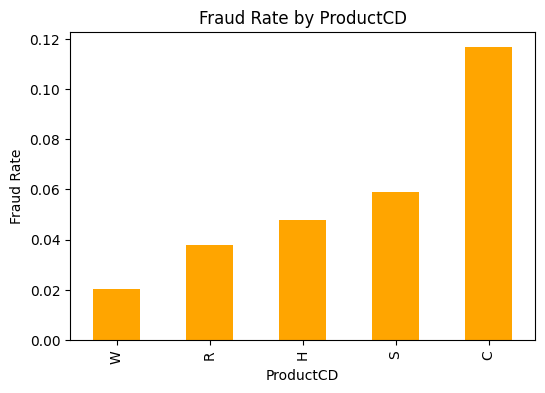

In [4]:
plt.figure(figsize=(6,4))
fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by ProductCD')
plt.ylabel('Fraud Rate')
plt.xlabel('ProductCD')
plt.show()

In [5]:
fraud_rate1 = data.groupby('DeviceType')['isFraud'].mean().sort_values()

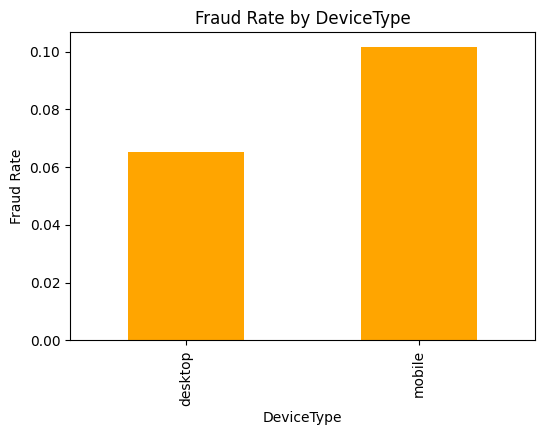

In [6]:
plt.figure(figsize=(6,4))
fraud_rate1.plot(kind='bar', color='orange')
plt.title('Fraud Rate by DeviceType')
plt.ylabel('Fraud Rate')
plt.xlabel('DeviceType')
plt.show()

In [7]:
fraud_rate2 = data.groupby('card4')['isFraud'].mean().sort_values()

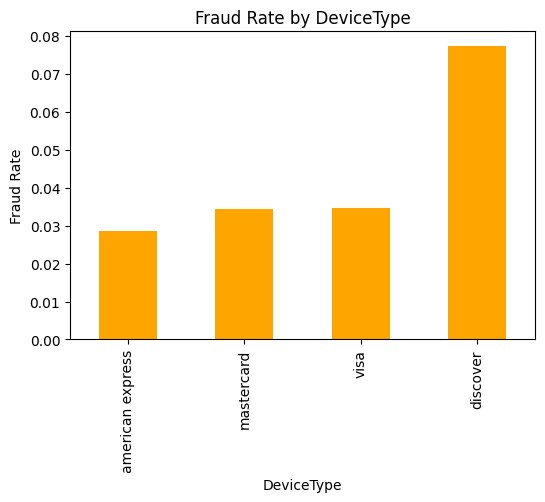

In [8]:
plt.figure(figsize=(6,4))
fraud_rate2.plot(kind='bar', color='orange')
plt.title('Fraud Rate by DeviceType')
plt.ylabel('Fraud Rate')
plt.xlabel('DeviceType')
plt.show()

In [9]:
data['DeviceInfo'].nunique()

1786

In [10]:
data['DeviceInfo'].isnull().sum()

np.int64(471874)

In [11]:
top_devices = data['DeviceInfo'].value_counts().head(10)

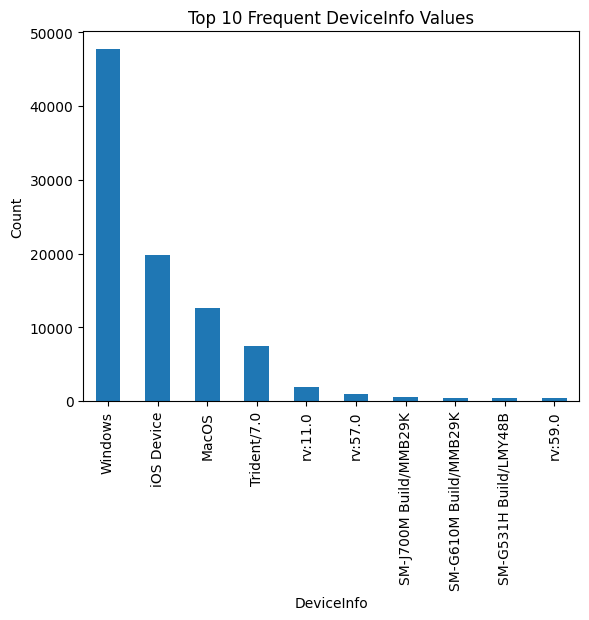

In [12]:
top_devices.plot(kind='bar')
plt.title('Top 10 Frequent DeviceInfo Values')
plt.xlabel('DeviceInfo')
plt.ylabel('Count')
plt.show()

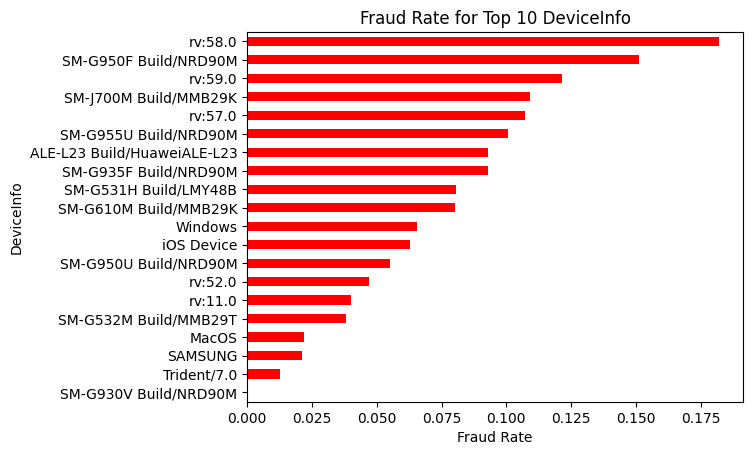

In [13]:
fraud_rate = data.groupby('DeviceInfo')['isFraud'].mean()
top_10 = data['DeviceInfo'].value_counts().head(20).index
fraud_rate_top = fraud_rate.loc[top_10].sort_values()

fraud_rate_top.plot(kind='barh', color='red')
plt.title('Fraud Rate for Top 10 DeviceInfo')
plt.xlabel('Fraud Rate')
plt.show()

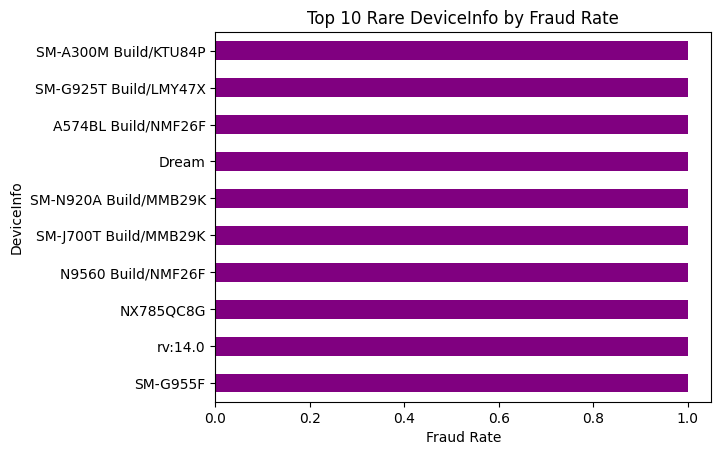

In [14]:
value_counts = data['DeviceInfo'].value_counts()
rare_devices = value_counts[value_counts < 100].index

rare_fraud_rate = fraud_rate.loc[rare_devices].sort_values(ascending=False).head(10)
rare_fraud_rate.plot(kind='barh', color='purple')
plt.title('Top 10 Rare DeviceInfo by Fraud Rate')
plt.xlabel('Fraud Rate')
plt.show()

In [15]:
data['DeviceInfo_missing'] = data['DeviceInfo'].isnull().astype(int)
missing_fraud_rate = data.groupby('DeviceInfo_missing')['isFraud'].mean()

missing_fraud_rate

DeviceInfo_missing
0    0.072531
1    0.025549
Name: isFraud, dtype: float64

In [16]:
data.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... id_32      id_33           id_34  \
0    NaN  150.0    discover  142.0  ...   NaN        NaN             NaN   
1  404.0  150.0  mastercard  102.0  ...   NaN        NaN             NaN   
2  490.0  150.0        visa  166.0  ...   NaN        NaN             NaN   
3  567.0  150.0  mastercard  117.0  ...   NaN        NaN             NaN   
4  514.0  150.0  mastercard  102.0  ...  32.0  2220x1080  match_status:2   

   id_35  id_36 id_37 id_38  DeviceType                     DeviceInfo  \
0    NaN    NaN   NaN   NaN         NaN                            NaN   
1    NaN    NaN   NaN   NaN         NaN                            NaN   
2    NaN    NaN   NaN   NaN         NaN                            NaN   
3    NaN    NaN   NaN   NaN         NaN                            NaN   
4      T      F     T     T      mobile  SAMSUNG SM-G892A Build/NRD90M   

   DeviceInfo_missing  
0                   1  
1                   1  
2                   1  
3                   1  
4                   0  

[5 rows x 435 columns]

In [17]:
card_fraud_rate = data.groupby('card4')['isFraud'].mean()


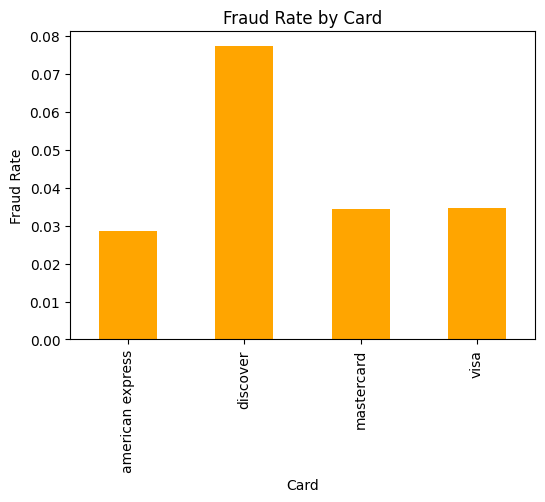

In [18]:
plt.figure(figsize=(6,4))
card_fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Card')
plt.ylabel('Fraud Rate')
plt.xlabel('Card')
plt.show()

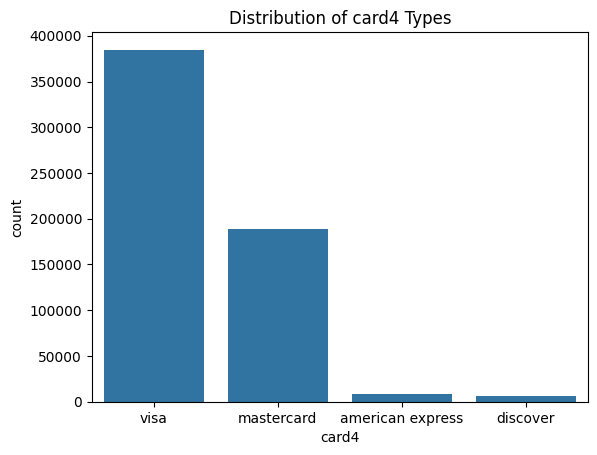

In [19]:
sns.countplot(x='card4', data=data, order=data['card4'].value_counts().index)
plt.title('Distribution of card4 Types')
plt.show()

In [20]:
data['TransactionDT'] = pd.to_timedelta(data['TransactionDT'], unit='s')

In [21]:
ref_date = pd.to_datetime('2025-01-01')

In [22]:
data['TransactionDatetime'] = ref_date + data['TransactionDT']

In [23]:
data['trans_hour'] = data['TransactionDatetime'].dt.hour
data['trans_dayofweek'] = data['TransactionDatetime'].dt.dayofweek
data['trans_day'] = data['TransactionDatetime'].dt.day

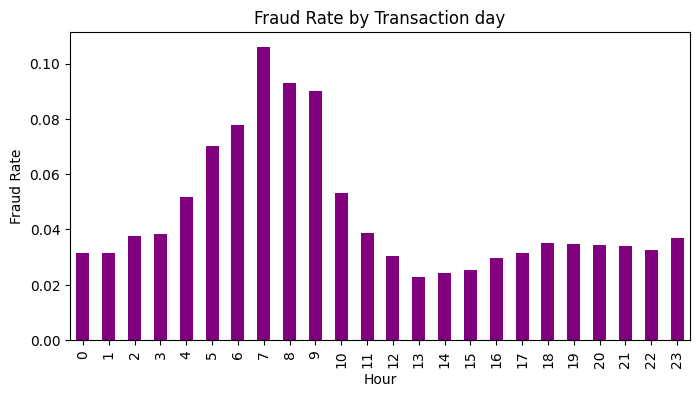

In [24]:
fraud_by_hour = data.groupby('trans_hour')['isFraud'].mean()

plt.figure(figsize=(8,4))
fraud_by_hour.plot(kind='bar', color='purple')
plt.title('Fraud Rate by Transaction day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.show()

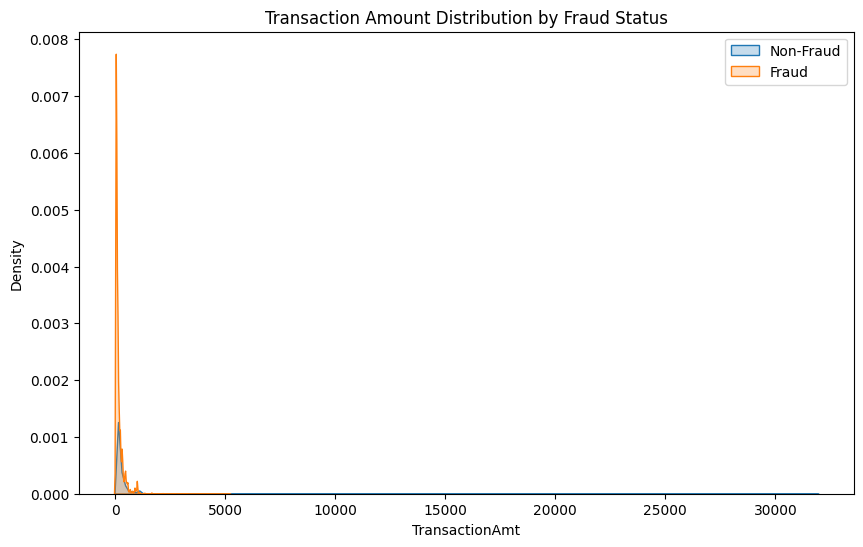

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['isFraud'] == 0, 'TransactionAmt'], label='Non-Fraud', fill=True, bw_adjust=0.5)
sns.kdeplot(data.loc[data['isFraud'] == 1, 'TransactionAmt'], label='Fraud', fill=True, bw_adjust=0.5)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('TransactionAmt')
plt.ylabel('Density')
plt.legend()
plt.show()


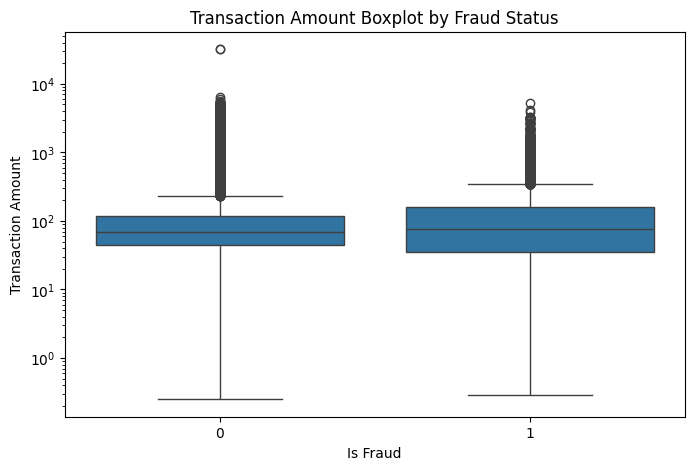

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='TransactionAmt', data=data)
plt.title('Transaction Amount Boxplot by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Apply log scale to handle skewness
plt.show()

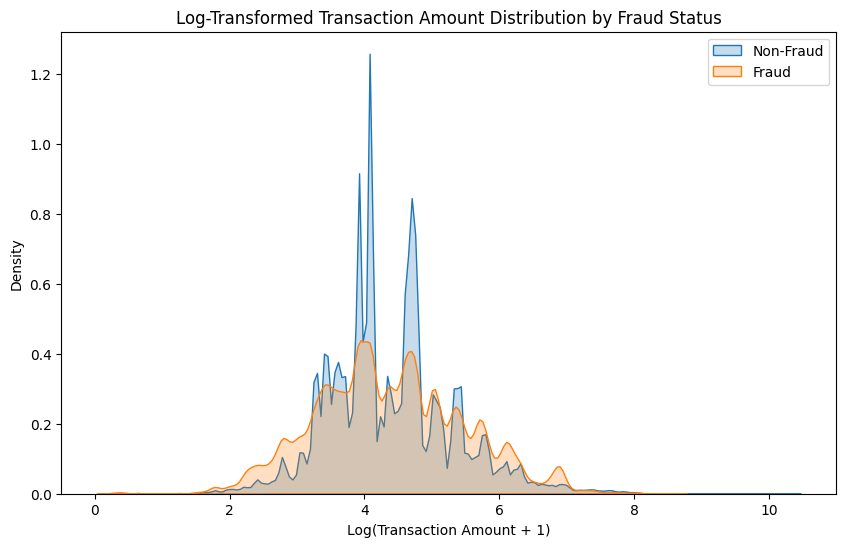

In [27]:

data['TransactionAmt_log'] = np.log1p(data['TransactionAmt'])

plt.figure(figsize=(10,6))
sns.kdeplot(data.loc[data['isFraud'] == 0, 'TransactionAmt_log'], label='Non-Fraud', fill=True, bw_adjust=0.5)
sns.kdeplot(data.loc[data['isFraud'] == 1, 'TransactionAmt_log'], label='Fraud', fill=True, bw_adjust=0.5)
plt.title('Log-Transformed Transaction Amount Distribution by Fraud Status')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Density')
plt.legend()
plt.show()